In [39]:
#librerias
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos


In [40]:
df = pd.read_csv('Data/terrenos.csv')
print(df.dtypes)#visualizamos que tipo de datos es cada comlumna 
dfOriginal=df
df #visualizamos nuestros datos 

No                                                 int64
X1 transaction fecha                             float64
X2 edad de casa                                  float64
X3 distancia a la estacion de MRT mas cercana    float64
X4 numero de tiendas                               int64
X5 latitud                                       float64
X6 longitud                                      float64
Y precio de la casa por m cuadrado               float64
dtype: object


,No,X1 transaction fecha,X2 edad de casa,X3 distancia a la estacion de MRT mas cercana,X4 numero de tiendas,X5 latitud,X6 longitud,Y precio de la casa por m cuadrado
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [41]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('Data', 'terrenos.csv'),delimiter=',', skiprows=1)
X, y = data[:,2 ], data[:, 7]
m = y.size  # m = numero de ejemplos de entrenamiento
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

In [42]:

X = np.stack([np.ones(m), X], axis=1)

In [43]:

def costes(X, y, theta):
    m = y.size  # numero de ejemplos de entrenamiento
    error=0
    error =(1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return error


In [44]:
def gradiente(X, y, theta, alpha, iteraciones):
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(iteraciones):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(costes(X, y, theta))

    return theta, J_history


In [45]:
def graficar(x, y):
    # Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('precios $ ')
    pyplot.xlabel('superficie M')


In [46]:
def descenso_de_gradiente(x,y,tita0,tita1,alfa,iteraciones):
    m=len(x)
    historial_costes=[]
    for ep in range(iteraciones):
        d_tita0=0
        d_tita1=0
        for i in range(m):
            hipotesis=tita0+tita1*x[i][1]
            d_tita0+=hipotesis-y[i]
            d_tita1+=(hipotesis-y[i])*x[i][1]
            historial_costes.append(costes(x, y, theta=np.array([tita0, tita1])))
        tita0 -=(d_tita0/m)*alfa
        tita1 -=(d_tita1/m)*alfa
    return tita0,tita1,historial_costes

[42.31081012 -0.24653411]


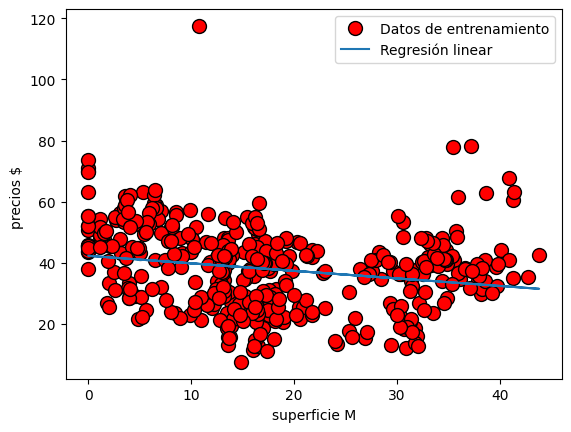

In [49]:
theta=np.zeros(2)
alpha=0.002
iteraciones=10000
theta,hist_costes=gradiente(X,y,theta,alpha,iteraciones)
graficar(X[:, 1], y)
print(theta)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])
